In [1]:
import plotly.io as pio
pio.renderers.default = "notebook+pdf"

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from typing import List
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

import warnings

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("./Data/kag_risk_factors_cervical_cancer.csv")
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
target = 'Biopsy'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

Remove duplicates

In [6]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 835 non-null    int64 
 1   Number of sexual partners           835 non-null    object
 2   First sexual intercourse            835 non-null    object
 3   Num of pregnancies                  835 non-null    object
 4   Smokes                              835 non-null    object
 5   Smokes (years)                      835 non-null    object
 6   Smokes (packs/year)                 835 non-null    object
 7   Hormonal Contraceptives             835 non-null    object
 8   Hormonal Contraceptives (years)     835 non-null    object
 9   IUD                                 835 non-null    object
 10  IUD (years)                         835 non-null    object
 11  STDs                                835 non-null    object

# Preprocessing

Replace "?" with the median for all columns.

In [7]:
df = df.replace('?', np.nan)

print("Check all Nan counts")
df.isnull().sum()

Check all Nan counts


Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

In [8]:
df=df._convert(numeric=True)
df = df.fillna(df.median())

print("Check all Nan counts")
df.isnull().sum()

Check all Nan counts


Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Other tasks
- Since Hinselmann, Schiller, Citology, Biopsy are all cancer test, create an aggreated group that count all of these information.
- Try to create an aggregated STD column that count all STD prediction
- Create an column for age group for easy visualization

In [9]:
#Create age group for visualization
def age_group(n):
    if n < 12:
        return "Child"
    elif n < 20:
        return "Teen"
    elif n < 30:
        return "20's"
    elif n < 40:
        return "30's"
    elif n < 50:
        return "40's"
    elif n < 60:
        return "50's"
    elif n < 70:
        return "60's"
    else:
        return "70+"

df["age_cat"] = df["Age"].apply(age_group)

In [10]:
#Aggregated std
std_cols = ['STDs:condylomatosis',
            'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis',
            'STDs:pelvic inflammatory disease',
            'STDs:genital herpes',
            'STDs:molluscum contagiosum',
            'STDs:AIDS',
            'STDs:HIV',
            'STDs:Hepatitis B',
            'STDs:HPV']
df["total_std"] = df[list(std_cols)].sum(axis=1)
std_agg_df = df.groupby("age_cat", as_index=False)[list(std_cols)].sum()

In [11]:
#Aggregated test result:
test_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
df["total_tests"] = df[test_cols].sum(axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           835 non-null    float64
 2   First sexual intercourse            835 non-null    float64
 3   Num of pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes (years)                      835 non-null    float64
 6   Smokes (packs/year)                 835 non-null    float64
 7   Hormonal Contraceptives             835 non-null    float64
 8   Hormonal Contraceptives (years)     835 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD (years)                         835 non-null    float64
 11  STDs                                835 non-n

# Data Exploration

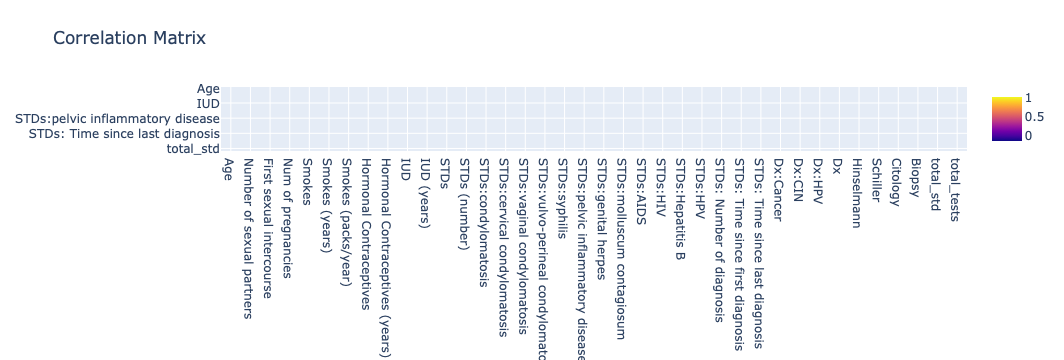

In [13]:
corr_matrix = df.corr()
corr_matrix.fillna(0,inplace=True)
corr_graph = px.imshow(corr_matrix, aspect="auto",title="Correlation Matrix")
corr_graph.show()

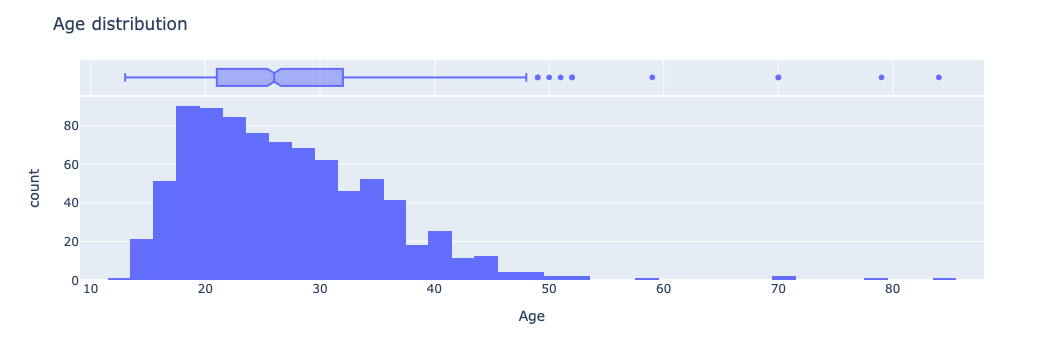

In [14]:
age_dist = px.histogram(df, x="Age", marginal="box")
age_dist.update_layout(title="Age distribution")
age_dist.show()

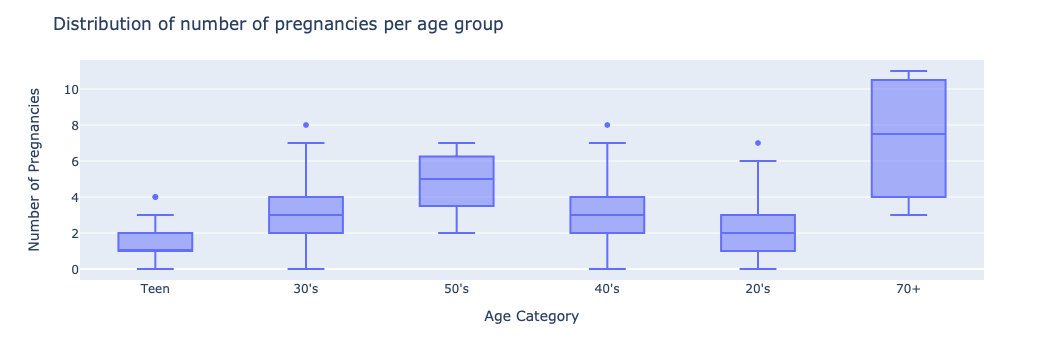

In [15]:
age_preg_bar = px.box(df, x="age_cat", y="Num of pregnancies", points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties",
                                       "Seventy and over"])
age_preg_bar.update_xaxes(title="Age Category")
age_preg_bar.update_yaxes(title="Number of Pregnancies")
age_preg_bar.update_layout(title="Distribution of number of pregnancies per age group")
age_preg_bar.show()

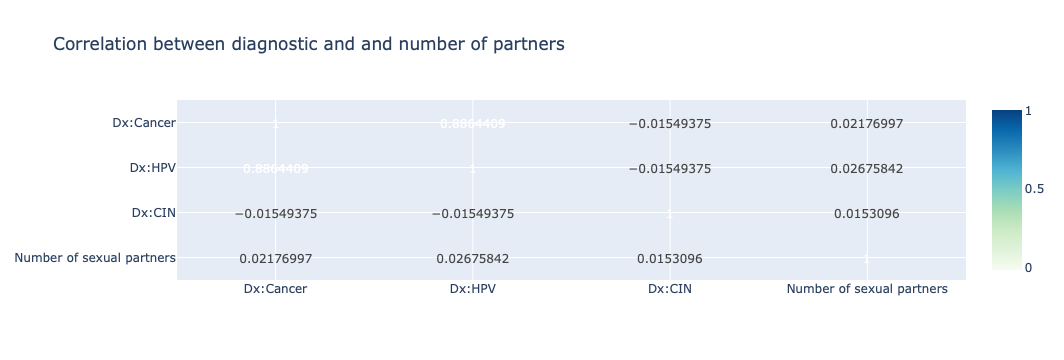

In [16]:
diagnoses_num_partner_compare_cols = ['Dx:Cancer',
                                      'Dx:HPV',
                                      'Dx:CIN',
                                      "Number of sexual partners",]
corr_matrix = df[diagnoses_num_partner_compare_cols].corr()
diagnoses_num_partner_heatmap = px.imshow(corr_matrix,
                              aspect="auto",
                              text_auto=True,
                                         title='Correlation between diagnostic and and number of partners',
                                         color_continuous_scale="gnbu")
diagnoses_num_partner_heatmap.show()

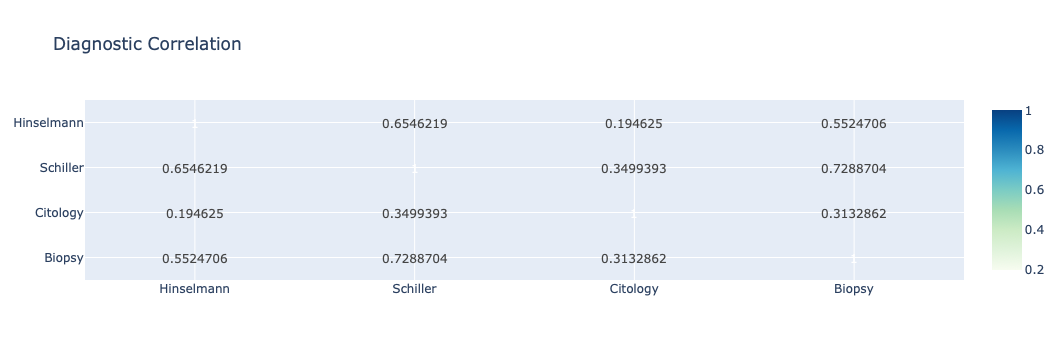

In [17]:
diagnoses_cols = ['Hinselmann','Schiller','Citology','Biopsy']
diagnoses_corr_matrix = df[diagnoses_cols].corr()
diagnoses_heatmap = px.imshow(diagnoses_corr_matrix, aspect="auto", text_auto=True,color_continuous_scale="gnbu",
                              title='Diagnostic Correlation')
diagnoses_heatmap.show()

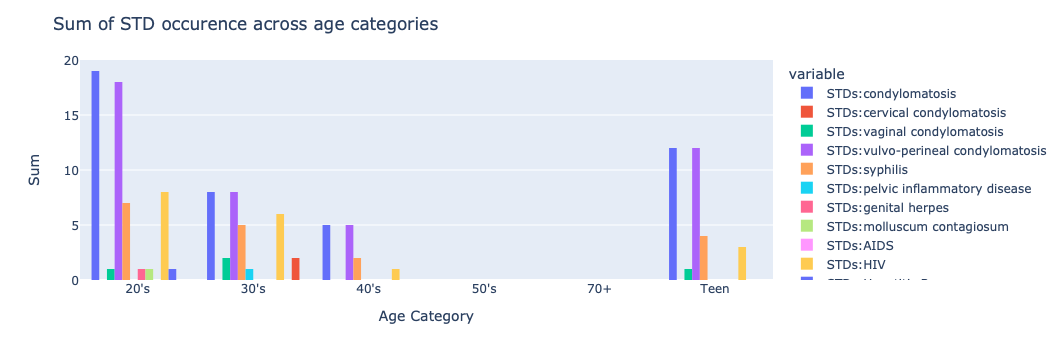

In [18]:
fig = px.histogram(std_agg_df, x="age_cat", y=list(std_cols), barmode="group", histfunc="sum")
fig.update_layout(title="Sum of STD occurence across age categories")
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Sum")
fig.show()

# Distribution of Classes

In [19]:
df[target].value_counts()

0    781
1     54
Name: Biopsy, dtype: int64

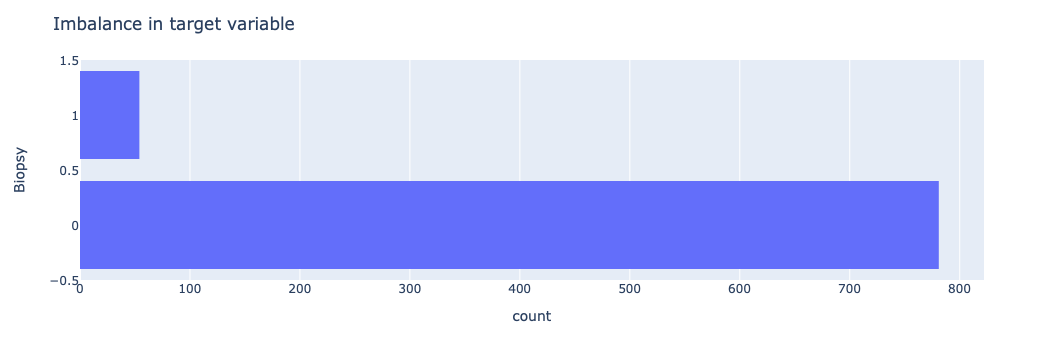

In [20]:
dx_cancer = px.histogram(df, y=target)
dx_cancer.update_layout(bargap=0.2)
dx_cancer.update_layout(title = "Imbalance in target variable")
dx_cancer.show()

# SMOTE or ADASYN:
- Since we have a issues of imbalance data set, either Smote or Adasyn can be deployed to create synthetic data to balance the dataset
- ADASYN is used for now

In [21]:
X = df.drop([target, "age_cat"], axis=1)
y = df[target].copy()

In [22]:
# smote = SMOTE(random_state=42)
# x_smote, y_smote = smote.fit_resample(X, y)
# risk_factor_df = x_smote.join(y_smote)
# risk_factor_df["age_cat"] = risk_factor_df["Age"].apply(age_cat)

In [23]:
adasyn = ADASYN(random_state=42)
X,y = adasyn.fit_resample(X,y)

# Train - test split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify = y, shuffle=True)#stratify = y

In [25]:
y_train.value_counts()

1    526
0    523
Name: Biopsy, dtype: int64

# PCA
- Principal Component Analysis is a method to reduce the dimenstion of larger dataset. This is used to increase performace. In this case 13 parameters can be used to explained 99% of the variable


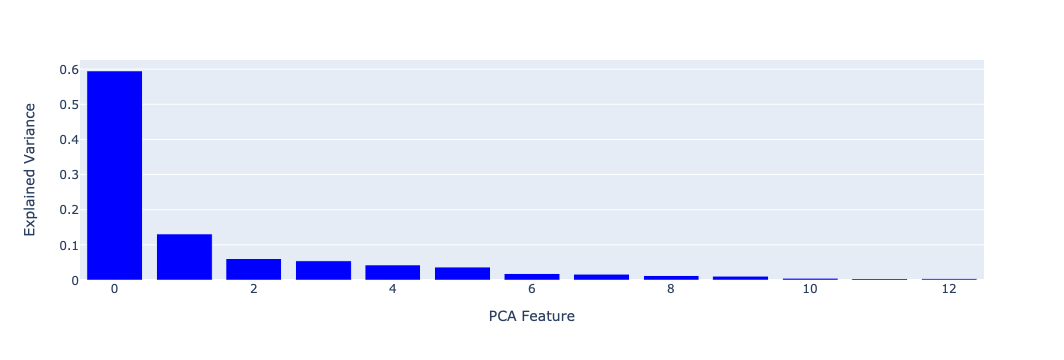

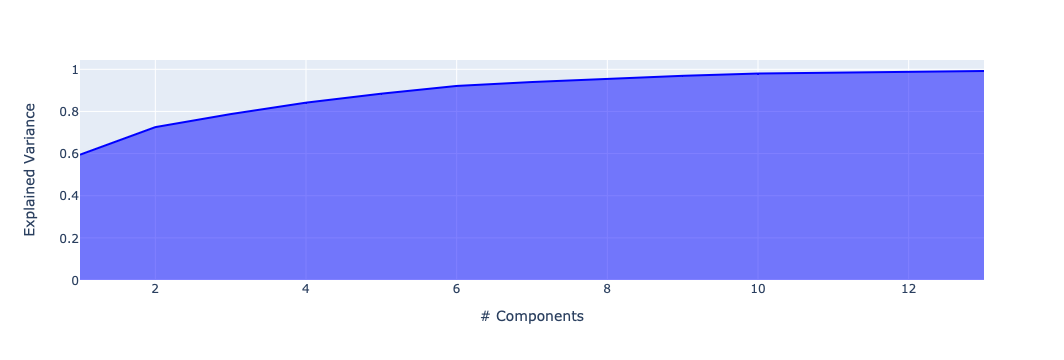

In [26]:
XT = RobustScaler().fit_transform(X_train)
pca = PCA(n_components=0.99)
XT = pca.fit_transform(XT)

dimensions = px.bar(x=range(pca.n_components_), y=pca.explained_variance_ratio_,
                    color_discrete_sequence=["blue"],
                    labels={"x":"PCA Feature","y":"Explained Variance"})
dimensions.show()
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

explained_variance = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    color_discrete_sequence=["blue"]
)
explained_variance.show()

# Model Application SkLearn
- 5 models are considered for this project
    - Logistic Regression
    - Random forest Classifier
    - KNeighbor Classifier
    - Support Vector Machine
    - CatBoost

In [27]:
pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("pca", PCA(n_components=13))
])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [28]:
param_grid = {'C': np.logspace(-5, 8, 15)}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

In [29]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=2, n_jobs=-1,
                                 max_features="sqrt")

In [30]:
knn_clf = KNeighborsClassifier()
knn_param_grid = {"n_neighbors": list(np.arange(1, 10, 2))}
knn_clf_cv = GridSearchCV(knn_clf, knn_param_grid, cv=10)

In [31]:
svm_clf = SVC()
svc_param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), }
svm_clf_cv = GridSearchCV(svm_clf, svc_param_grid, cv=5)

In [32]:
col_names = ["Classifier Name", "Accuracy Score", "Precision Score",
             "Recall Score", "F1 Score"]
summary_df = pd.DataFrame(columns=col_names)

est_name = []
est_acc = []
precision_score = []
recall_score = []
f1score = []
est_conf_matrix = []

estimators = [
    ("LogisticRegression", logreg_cv),
    ("RandomForestClassifier ", rnd_clf),
    ("KNeighborsClassifier", knn_clf_cv),
    ("SupportVectorClassifier", svm_clf_cv),
    ]

for i in range(0, len(estimators)):
    clf_name = estimators[i][0]
    clf = estimators[i][1]
    if clf_name!="CatBoost":
        clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # print(pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["predicted"],margins=True))
    est_name.append(estimators[i][0])
    est_acc.append(accuracy_score(y_test, y_pred))
    scores = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    precision_score.append(scores[0])
    recall_score.append(scores[1])
    f1score.append(scores[2])
    est_conf_matrix.append(confusion_matrix(y_test,y_pred))


summary_df[col_names[0]] = est_name
summary_df[col_names[1]] = est_acc
summary_df[col_names[2]] = precision_score
summary_df[col_names[3]] = recall_score
summary_df[col_names[4]] = f1score


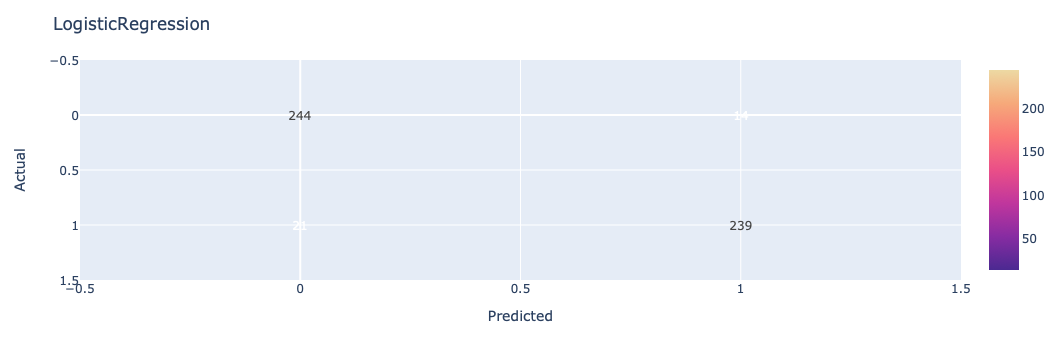

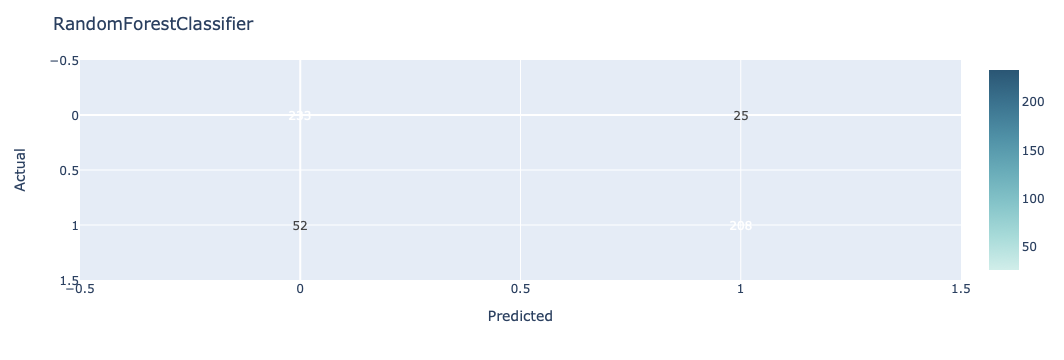

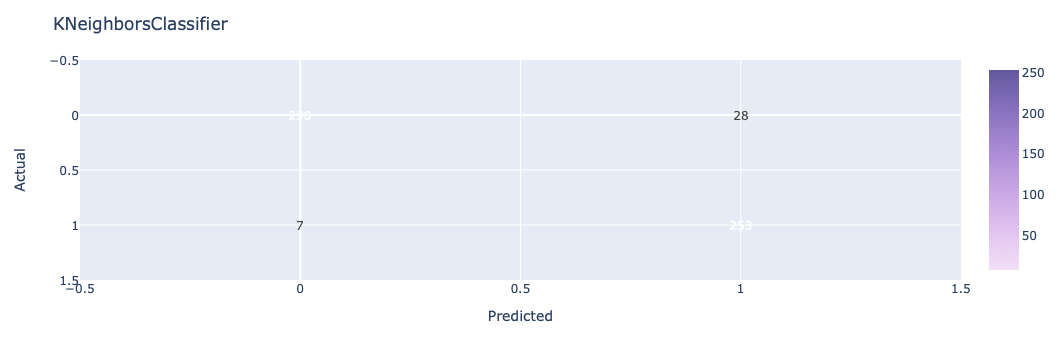

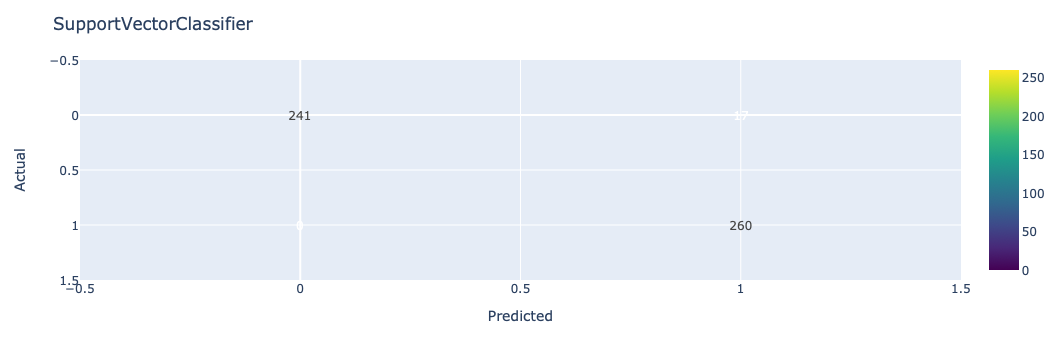

In [33]:
color_scales = ["agsunset","teal","purp","viridis","fall"]
for i in range(0,len(est_conf_matrix)):
    heatmap = px.imshow(est_conf_matrix[i],aspect="auto",
                        text_auto=True,
                        color_continuous_scale=color_scales[i])
    heatmap.update_layout(title = est_name[i])
    heatmap.update_xaxes(title="Predicted")
    heatmap.update_yaxes(title="Actual")
    heatmap.show()

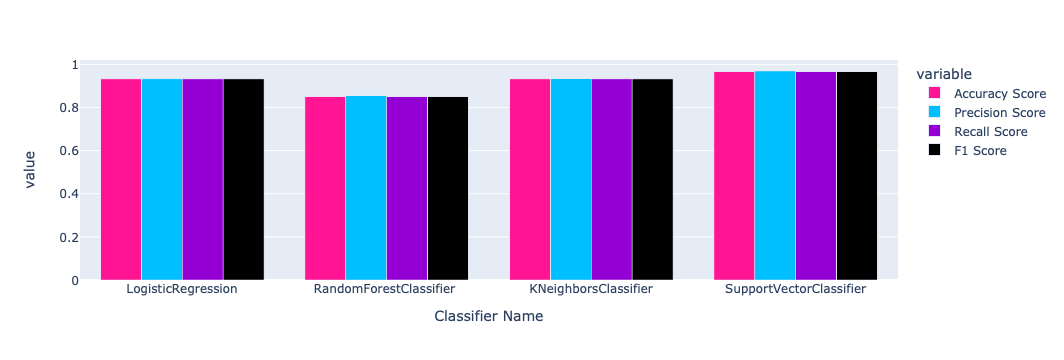

In [34]:
acc_comparison = px.bar(summary_df, x="Classifier Name",
                        y=col_names[1:len(col_names)],
                        color_discrete_sequence=["deeppink",
                                                 "deepskyblue",
                                                 "darkviolet",
                                                 "black"],
                        barmode="group")
acc_comparison.show()

In [35]:
summary_df

,Classifier Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,LogisticRegression,0.932432,0.932756,0.932432,0.932424
1,RandomForestClassifier,0.851351,0.855269,0.851351,0.850977
2,KNeighborsClassifier,0.932432,0.935275,0.932432,0.932311
3,SupportVectorClassifier,0.967181,0.969196,0.967181,0.967142


# Application Spark
Spark tend to perform faster when reading from csv compared to using pandas dataframe thus, the X and y df has been made into X and y csv file

In [42]:
import findspark
findspark.init()
findspark.find()

from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
conf = SparkConf().setAppName("MyApp").set("spark.executor.cores", "2")


spark = SparkSession.builder.config(conf=conf).getOrCreate()


bash: /home/thuannhan/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/thuannhan/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by bash)
23/07/28 02:14:16 WARN Utils: Your hostname, pop-os resolves to a loopback address: 127.0.1.1; using 192.168.1.4 instead (on interface enp3s0)
23/07/28 02:14:16 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/28 02:14:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [43]:
df_shuffle=X

In [44]:
df_shuffle[target]=y

In [45]:
df_shuffle=df_shuffle.sample(frac=1)

In [46]:
df_shuffle

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,total_std,total_tests,Biopsy
1257,28,1.950237,18.000000,3.950237,0.0,0.000000,0.000000,0.049763,0.024881,0.000000,...,0,0,0,0,0,1,0,0.000000,3,1
136,29,4.000000,18.000000,3.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0,0,0,0,0,0,0,0.000000,0,0
184,28,2.000000,17.000000,2.000000,0.0,0.000000,0.000000,1.000000,9.000000,0.000000,...,0,0,0,0,1,1,0,0.000000,3,1
1314,20,2.000000,16.947865,3.000000,0.0,0.000000,0.000000,0.350712,0.203413,0.649288,...,0,0,0,0,1,1,0,0.000000,3,1
1555,16,1.167483,12.837413,2.000000,0.0,0.000000,0.000000,0.832517,0.349657,0.000000,...,0,0,0,0,0,0,0,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,18,1.306318,17.693682,1.306318,0.0,0.000000,0.000000,0.693682,0.693682,0.000000,...,0,0,0,0,0,1,0,0.000000,3,1
1540,25,3.892605,15.595070,2.000000,0.0,0.000000,0.000000,1.000000,0.826883,0.000000,...,0,0,0,0,0,1,0,0.892605,3,1
426,20,3.000000,17.000000,2.000000,0.0,0.000000,0.000000,1.000000,0.250000,0.000000,...,0,0,0,0,0,0,1,0.000000,2,1
1066,22,2.074431,15.148863,2.074431,1.0,5.372157,1.305824,1.000000,6.000000,0.000000,...,0,0,0,0,0,1,0,0.000000,2,1


In [47]:
df_spark=spark.createDataFrame(df_shuffle)

In [49]:
model_list=[]
model_list.append(("LogRegression",LogisticRegression_Spark(featuresCol="features", labelCol=target)))
model_list.append(("DecTree",DecisionTreeClassifier_Spark(featuresCol="features", labelCol=target)))
model_list.append(("RandomForrest",RandomForestClassifier_Spark(featuresCol="features", labelCol=target)))
model_list.append(("GBTClassifier",GBTClassifier_Spark(featuresCol="features", labelCol=target)))
model_list.append(("LinearSVC",LinearSVC_Spark(featuresCol="features", labelCol=target)))
model_list.append(("NaiveBayes",NaiveBayes_Spark(featuresCol="features", labelCol=target)))
model_list.append(("FMClassifier",FMClassifier_Spark(featuresCol="features", labelCol=target)))


In [50]:
Assembler=VectorAssembler(inputCols=df_spark.columns[:-1],
                           outputCol='features')
df_spark=Assembler.transform(df_spark)


In [51]:
df_train_test_spark=df_spark.select('features',target)
df_train_test_spark.show()


23/07/28 02:14:35 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+------+
|            features|Biopsy|
+--------------------+------+
|(37,[0,1,2,3,7,8,...|     1|
|(37,[0,1,2,3,7,8,...|     0|
|(37,[0,1,2,3,7,8,...|     1|
|(37,[0,1,2,3,7,8,...|     1|
|(37,[0,1,2,3,7,8,...|     1|
|(37,[0,1,2,3,4,5,...|     1|
|(37,[0,1,2,3,26,2...|     0|
|(37,[0,1,2,3,7,8,...|     1|
|(37,[0,1,2,3,7,8,...|     0|
|(37,[0,1,2,3,26,2...|     0|
|(37,[0,1,2,3,26,2...|     0|
|(37,[0,1,2,3,7,8,...|     0|
|(37,[0,1,2,3,7,8,...|     1|
|(37,[0,1,2,3,7,8,...|     0|
|(37,[0,1,2,3,7,8,...|     0|
|(37,[0,1,2,3,7,8,...|     1|
|(37,[0,1,2,3,7,8,...|     1|
|(37,[0,1,2,3,7,8,...|     0|
|(37,[0,1,2,3,7,8,...|     0|
|(37,[0,1,2,3,7,8,...|     1|
+--------------------+------+
only showing top 20 rows



In [52]:
import timeit

performance_metrics=['accuracy','precisionByLabel','recallByLabel','f1']
cols_name=['Name']

for  p in performance_metrics:
    cols_name.append(p)
cols_name.append('time(s)')
performance_df_spark = pd.DataFrame(columns = cols_name)


In [53]:
for itteration in range(1):
    #print(itteration)
    #df_shuffle=df_train_test_spark.orderBy(rand())
    trainDF,testDF=df_train_test_spark.randomSplit([0.75,0.25])
    
    #Handle all normal model
    for model in model_list:
        start_time = timeit.default_timer()
        cur_model=model[1]
        cur_model=cur_model.fit(trainDF)
        pred=cur_model.transform(testDF)
        temp = [model[0]]
        
        for p in performance_metrics:
            evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol=target, metricName=p)
            temp.append(evaluator.evaluate(pred))
            
        end_time=timeit.default_timer()-start_time
        
        temp.append(end_time)
        performance_df_spark.loc[len(performance_df_spark.index)] = temp
        print(cur_model,end_time)
    


LogisticRegressionModel: uid=LogisticRegression_df909fac779d, numClasses=2, numFeatures=37 2.956532611000057
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_43776d1655b6, depth=5, numNodes=19, numClasses=2, numFeatures=37 1.3925645519999534
RandomForestClassificationModel: uid=RandomForestClassifier_3dbaffd70f5c, numTrees=20, numClasses=2, numFeatures=37 1.3436405669999658


23/07/28 02:14:46 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/07/28 02:14:46 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


GBTClassificationModel: uid = GBTClassifier_555d535635bc, numTrees=20, numClasses=2, numFeatures=37 3.482194691000018
LinearSVCModel: uid=LinearSVC_23e5025cd7d8, numClasses=2, numFeatures=37 1.6698906269999725
NaiveBayesModel: uid=NaiveBayes_e19667cae2a3, modelType=multinomial, numClasses=2, numFeatures=37 0.8319027600000481
FMClassificationModel: uid=FMClassifier_d72e72a932f4, numClasses=2, numFeatures=37, factorSize=8, fitLinear=true, fitIntercept=true 2.9263409389999424


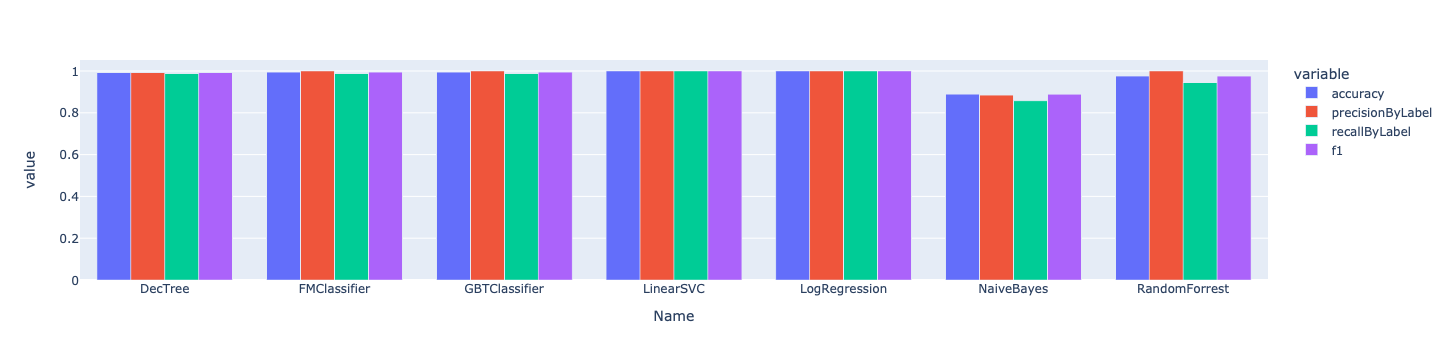

In [54]:
avg_df=performance_df_spark.groupby('Name',as_index=False)[performance_metrics].mean()
acc_comparison = px.bar(avg_df, x="Name",
                        y=performance_metrics,
                        barmode="group")
acc_comparison.show()


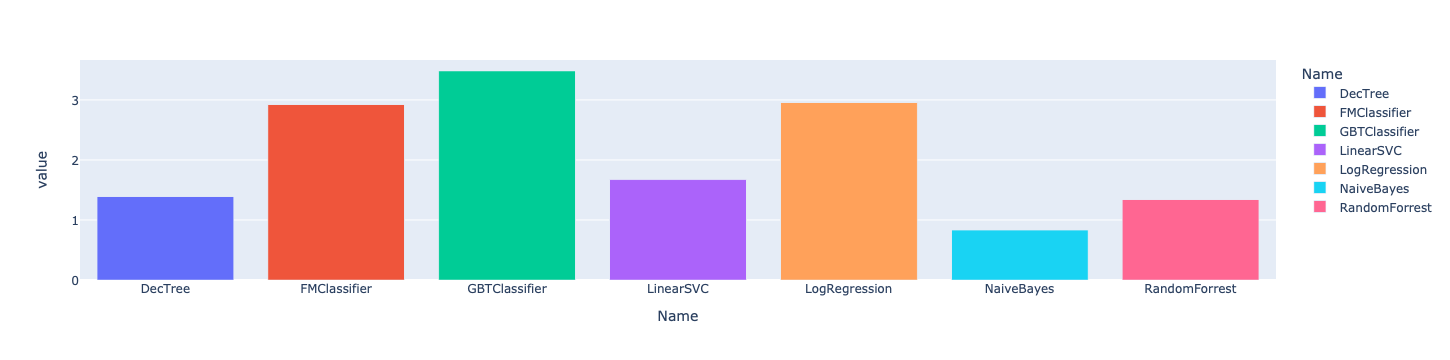

In [55]:
px.bar(performance_df_spark.groupby('Name',as_index=False)['time(s)'].mean(),x="Name",y=["time(s)"],color='Name')


In [56]:
performance_df_spark.groupby('Name',as_index=False).mean()


,Name,accuracy,precisionByLabel,recallByLabel,f1,time(s)
0,DecTree,0.991892,0.993750,0.987578,0.991889,1.392565
1,FMClassifier,0.994595,1.000000,0.987578,0.994591,2.926341
2,GBTClassifier,0.994595,1.000000,0.987578,0.994591,3.482195
3,LinearSVC,1.000000,1.000000,1.000000,1.000000,1.669891
4,LogRegression,1.000000,1.000000,1.000000,1.000000,2.956533
5,NaiveBayes,0.889189,0.884615,0.857143,0.888970,0.831903
6,RandomForrest,0.975676,1.000000,0.944099,0.975582,1.343641


In [57]:
performance_df_spark


,Name,accuracy,precisionByLabel,recallByLabel,f1,time(s)
0,LogRegression,1.000000,1.000000,1.000000,1.000000,2.956533
1,DecTree,0.991892,0.993750,0.987578,0.991889,1.392565
2,RandomForrest,0.975676,1.000000,0.944099,0.975582,1.343641
3,GBTClassifier,0.994595,1.000000,0.987578,0.994591,3.482195
4,LinearSVC,1.000000,1.000000,1.000000,1.000000,1.669891
5,NaiveBayes,0.889189,0.884615,0.857143,0.888970,0.831903
6,FMClassifier,0.994595,1.000000,0.987578,0.994591,2.926341
